In [1]:
import os
import datetime
import numpy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorboard import notebook
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
tf.keras.backend.clear_session()
print(sklearn.__version__)
print(tf.__version__)

0.22.2.post1
2.2.0-rc3


Using TensorFlow backend.


The Code

In [2]:
from google.colab import files
files.upload()

Saving X_test.npy to X_test.npy
Saving X_train.npy to X_train.npy
Saving y_test.npy to y_test.npy
Saving y_train.npy to y_train.npy


In [0]:
import numpy as np

X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

In [4]:
# Check the shape of the data

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(32, 32, 3, 10000)
(32, 32, 3, 1000)
(10000, 1)
(1000, 1)


In [5]:
# Fixing the axes of the given dataset

train_images = np.moveaxis(X_train, -1, 0)
test_images = np.moveaxis(X_test, -1, 0)

print(train_images.shape)
print(test_images.shape)

(1000, 32, 32, 3)
(10000, 32, 32, 3)


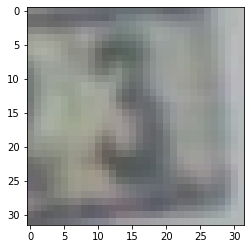

Label:  [3]


In [6]:
#plotting the images
# Plot a random image and its label

plt.imshow(train_images[31])
plt.show()

print('Label: ', y_train[31])

In [0]:
# Convert train and test images into 'float64' type

train_images = train_images.astype('float64')
test_images = test_images.astype('float64')
train_labels = y_train.astype('int64')
test_labels = y_test.astype('int64')

In [9]:
# Normalize the images data

print('Min: {}, Max: {}'.format(train_images.min(), train_images.max()))

train_images /= 255.0
test_images /= 255.0

Min: 0.0, Max: 255.0


In [0]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels,
                                                  test_size=0.10, random_state=22)

In [0]:
# One-hot encoding of train and test labels

lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

Model with No Agumentation

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(len(y_train[0]), activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',      
              metrics=['accuracy'])


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                216330    
Total params: 291,978
Trainable params: 291,978
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(test_images, test_labels))

Train on 850 samples, validate on 10000 samples
Epoch 1/20
850/850 [==============================] - 9s 11ms/step - loss: 1.3621 - accuracy: 0.5765 - val_loss: 1.7579 - val_accuracy: 0.4342
Epoch 2/20
850/850 [==============================] - 9s 11ms/step - loss: 1.1776 - accuracy: 0.6859 - val_loss: 1.8900 - val_accuracy: 0.4079
Epoch 3/20
850/850 [==============================] - 9s 11ms/step - loss: 1.1662 - accuracy: 0.6506 - val_loss: 1.6640 - val_accuracy: 0.4884
Epoch 4/20
850/850 [==============================] - 9s 10ms/step - loss: 1.0255 - accuracy: 0.6965 - val_loss: 1.6060 - val_accuracy: 0.4957
Epoch 5/20
850/850 [==============================] - 9s 11ms/step - loss: 1.0606 - accuracy: 0.6518 - val_loss: 1.6462 - val_accuracy: 0.4858
Epoch 6/20
850/850 [==============================] - 9s 11ms/step - loss: 0.8853 - accuracy: 0.7388 - val_loss: 1.4916 - val_accuracy: 0.5480
Epoch 7/20
850/850 [==============================] - 9s 11ms/step - loss: 0.7757 - accuracy: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


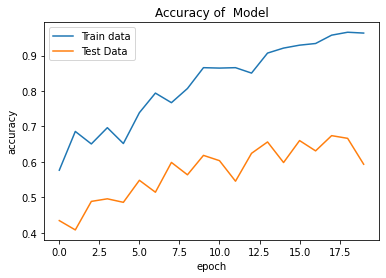

In [19]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy of  Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train data', 'Test Data'], loc='bottom right')
plt.show()

CNN with Agumentation

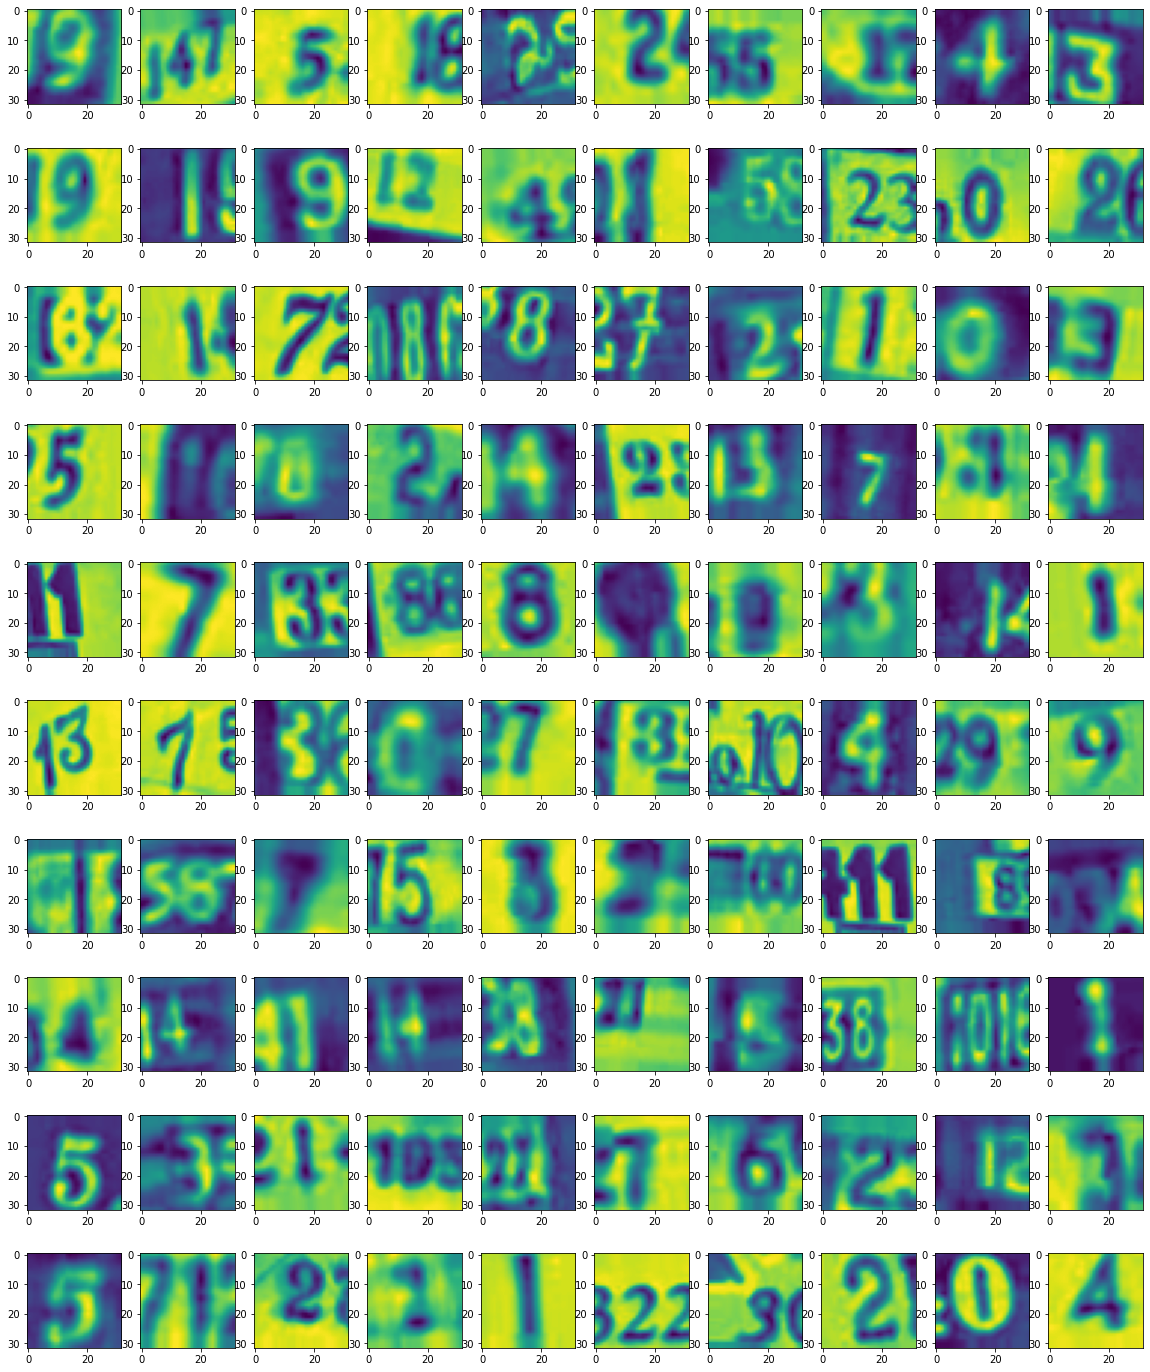

In [20]:
# Data augmentation

datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

batch = datagen.flow(X_train, y_train, batch_size=100)
fig = plt.figure(figsize=[20, 25])
for i,img in enumerate(batch[0][0]):
    ax = fig.add_subplot(10, 10, i + 1)
    ax.imshow(img[:,:,0])

In [21]:
history1 = model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                              epochs=20, validation_data=(test_images, test_labels))
                        

Epoch 1/20
7/7 [==============================] - 9s 1s/step - loss: 1.1401 - accuracy: 0.6788 - val_loss: 1.3503 - val_accuracy: 0.6561
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 0.8495 - accuracy: 0.7471 - val_loss: 1.2979 - val_accuracy: 0.6664
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.7631 - accuracy: 0.7788 - val_loss: 1.3494 - val_accuracy: 0.6465
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.7705 - accuracy: 0.7906 - val_loss: 1.4624 - val_accuracy: 0.6523
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.7556 - accuracy: 0.7659 - val_loss: 1.3537 - val_accuracy: 0.6604
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.6550 - accuracy: 0.8176 - val_loss: 1.2629 - val_accuracy: 0.6760
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.7740 - accuracy: 0.7706 - val_loss: 1.2051 - val_accuracy: 0.6892
Epoch 8/20
7/7 [=========================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


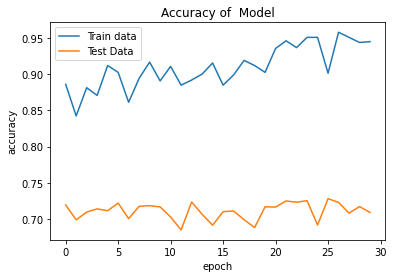

In [23]:
plt.plot(history1.history["accuracy"])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy of  Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train data', 'Test Data'], loc='bottom right')
plt.show()

Using the existing Model : VGG16


In [0]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

In [34]:
# Use architect from ResNet50
model= VGG16(include_top = False,weights = 'imagenet',input_shape = (32, 32, 3))

58892288/58889256 [==============================] - 5s 0us/step


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])


In [24]:
history1 = model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                              epochs=30, validation_data=(test_images, test_labels))

Epoch 1/30
7/7 [==============================] - 10s 1s/step - loss: 0.1950 - accuracy: 0.9506 - val_loss: 1.4342 - val_accuracy: 0.7211
Epoch 2/30
7/7 [==============================] - 9s 1s/step - loss: 0.2156 - accuracy: 0.9435 - val_loss: 1.3805 - val_accuracy: 0.7213
Epoch 3/30
7/7 [==============================] - 9s 1s/step - loss: 0.2040 - accuracy: 0.9471 - val_loss: 1.3573 - val_accuracy: 0.7242
Epoch 4/30
7/7 [==============================] - 9s 1s/step - loss: 0.1582 - accuracy: 0.9588 - val_loss: 1.3842 - val_accuracy: 0.7316
Epoch 5/30
7/7 [==============================] - 9s 1s/step - loss: 0.2022 - accuracy: 0.9447 - val_loss: 1.4116 - val_accuracy: 0.7248
Epoch 6/30
7/7 [==============================] - 9s 1s/step - loss: 0.1794 - accuracy: 0.9494 - val_loss: 1.5237 - val_accuracy: 0.7068
Epoch 7/30
7/7 [==============================] - 9s 1s/step - loss: 0.1693 - accuracy: 0.9518 - val_loss: 1.4252 - val_accuracy: 0.7294
Epoch 8/30
7/7 [========================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


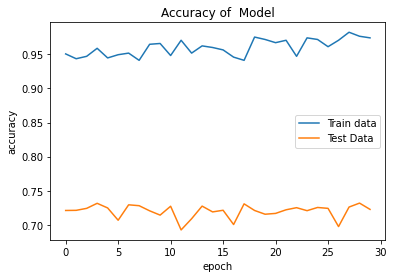

In [26]:
plt.plot(history1.history["accuracy"])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy of  Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train data', 'Test Data'], loc='bottom right')
plt.show()